## <span style="color:blue">  Numerical exercises 2</span>

### Exercise 02.1

Calcolo l'integrale seguente: $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

-  campionando una distribuzione uniforme fra 0 e 1:

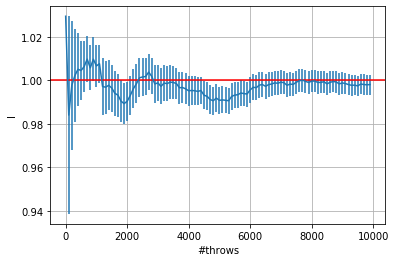

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=10000
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
x = np.arange(N) 

data=np.loadtxt("es1/medie.txt")
error=np.loadtxt("es1/incertezze.txt")  
x*=L # Number of throws = block * (Number of throws in each block)
plt.axhline(y=1, color='red')
plt.errorbar(x,data, yerr=error)
plt.xlabel('#throws')
plt.ylabel('I')
plt.grid(True)
plt.show()

- con la tecnica dell'importance sampling, prendendo come distribuzione non uniforme $p(x)=arccos(x)$:

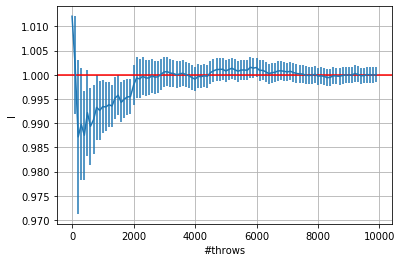

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=10000
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
x = np.arange(N) 
#err = np.arange(N)
data=np.loadtxt("es1/medieI.txt")
error=np.loadtxt("es1/incertezzeI.txt")  
x*=L # Number of throws = block * (Number of throws in each block)
plt.axhline(y=1, color='red')
plt.errorbar(x,data, yerr=error)
plt.xlabel('#throws')
plt.ylabel('I')
plt.grid(True)
plt.show()

### Exercise 02.2

Random walk in un reticolo cubico

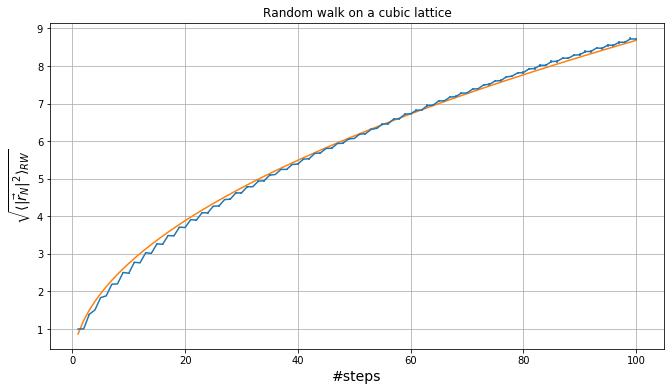

optimized parameter [a] =
[0.86828502]
parameters uncertainty =
[0.00147915]


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def f(x, a):
    return a * x**(1/2)


N=100                 # Number of steps
           
x = np.arange(1, N +1) 

data=np.loadtxt("es2.1/medie.txt")
error=np.loadtxt("es2.1/incertezze.txt")  
plt.figure(figsize=(11,6))
           
plt.errorbar(x,data, yerr=error)
p_opt, p_cov = curve_fit(f,x,data)
y_fit=f(x,p_opt[0])
plt.plot(x,y_fit)
plt.title('Random walk on a cubic lattice')
plt.xlabel('#steps', fontsize = 14)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize = 14)
plt.grid(True)
plt.show()

print("optimized parameter [a] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

Random walk nel continuo

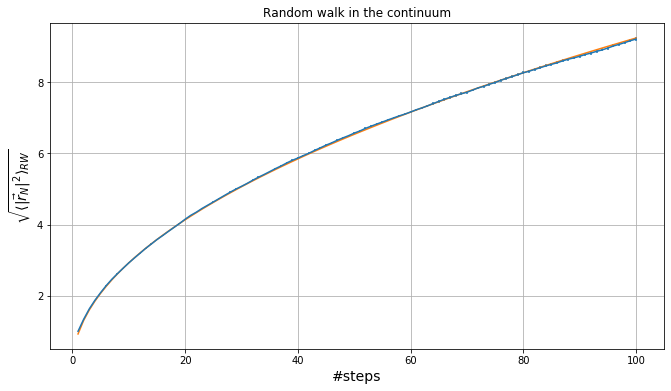

optimized parameter [a] =
[0.92447316]
parameters uncertainty =
[0.00033107]


In [7]:
data=np.loadtxt("es2.2/medie.txt")
error=np.loadtxt("es2.2/incertezze.txt")  
plt.figure(figsize=(11,6))
plt.errorbar(x,data, yerr=error)

p_opt, p_cov = curve_fit(f,x,data)
y_fit=f(x,p_opt[0])
plt.plot(x,y_fit)
plt.title('Random walk in the continuum')
plt.xlabel('#steps', fontsize = 14)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize = 14)
plt.grid(True)
plt.show()

print("optimized parameter [a] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

In entrambi i casi è possibile fittare la curva di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in funzione del numero di passi con una funzione $f(N)=k\sqrt{N}$. Questo è un indice del fatto che il moto browniano ha un comportamento di tipo diffusivo.

Nel caso 1D la probabilità di trovare il walker nel punto n-esimo all'istante k-esimo è dato da $$P(n\Delta x, k\Delta t) = \frac{1}{2}[P((n-1)\Delta x, (k-1)\Delta t)+P((n+1)\Delta x, (k-1)\Delta t)]$$

Nel limite per $\Delta x\to 0, \Delta t\to 0$, con $\frac{\Delta x^2}{\Delta t}\to 2D$ si ha l'equazione di diffuzione $$\frac{\partial P}{\partial t}(x,t) = D\frac{\partial^2P}{\partial x^2} $$ dove D è detto coefficiente di diffusione.

Segue che la densità di probabilità di trovare il walker nella posizione $x$ al tempo $t$ è data dalla distribuzione gaussiana $$P(x,t)=(\frac{1}{\sqrt{4\pi Dt}}\exp(-\frac{x^2}{4Dt}))$$ caratterizzata da valor medio $\langle x(t)\rangle=0$ e varianza $\langle x^2(t)\rangle=2Dt$.